# read radar date (hangzhou & wenzhou)

In [1]:
%matplotlib inline
from pycwr.io.auto_io import radar_io 
import numpy as np
import pandas as pd
import xarray as xr
import pyart


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



/home/liyuan3970/anaconda3/lib/python3.7/site-packages/h5py/_hl/base.py:19: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import (Mapping, MutableMapping, KeysView,
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/h5py/_hl/base.py:19: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import (Mapping, MutableMapping, KeysView,
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/h5py/_hl/base.py:19: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import (Mapping, MutableMapping, KeysView,


In [4]:
f1 = r"Z_RADR_I_Z9571_20190809172500_O_DOR_SA_CAP.bin.bz2"
f2 = r"Z_RADR_I_Z9577_20190809172500_O_DOR_SA_CAP.bin.bz2"
basedata1 = radar_io(f1) 
basedata2 = radar_io(f2)
print(dir(basedata1))

['ToPRD', 'ToPyartRadar', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'radar_obj']


In [33]:
f1 = r"Z_RADR_I_Z9571_20190809172500_O_DOR_SA_CAP.bin.bz2"
f2 = r"Z_RADR_I_Z9577_20190809172500_O_DOR_SA_CAP.bin.bz2"
basedata1 = radar_io(f1) 
basedata2 = radar_io(f2) 

radar1 = basedata1.ToPyartRadar()
radar2 = basedata2.ToPyartRadar()
pyart.io.write_cfradial("cfradial1.nc", radar1)
pyart.io.write_cfradial("cfradial2.nc", radar2)

# read cfradar file


In [35]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
import multidop
import pyart
import tempfile
import os
import glob
import time
%matplotlib inline

In [36]:
fc1 = glob.glob('cfradial1.nc')
fc2 = glob.glob('cfradial2.nc')
print(fc1, fc2)

['cfradial1.nc'] ['cfradial2.nc']


In [37]:
r1 = pyart.io.read(fc1[0])
r2 = pyart.io.read(fc2[0])
print(r1.fields.keys(), r2.fields.keys())

dict_keys(['reflectivity', 'velocity', 'spectrum_width']) dict_keys(['reflectivity', 'velocity', 'spectrum_width'])


In [7]:
cp = deepcopy(r1.fields['reflectivity']['data'])
r1.add_field_like('reflectivity', 'DT', cp, replace_existing=True)
gatefilter = pyart.correct.GateFilter(r1)
gatefilter.exclude_masked('reflectivity')
corr_vel = pyart.correct.dealias_region_based(
    r1, vel_field='velocity', keep_original=False, 
    gatefilter=gatefilter, centered=True)
r1.add_field('VT', corr_vel, replace_existing=True)

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 0.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 1.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 2.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 3.
  warnings.warn(msg, UserWarning)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 4.
  warnings.warn(msg, UserWarning)


In [8]:
cp = deepcopy(r2.fields['reflectivity']['data'])
r2.add_field_like('reflectivity', 'DT', cp, replace_existing=True)
gatefilter = pyart.correct.GateFilter(r2)
gatefilter.exclude_masked('reflectivity')
corr_vel = pyart.correct.dealias_region_based(
    r2, vel_field='velocity', keep_original=False, 
    gatefilter=gatefilter, centered=True)
r2.add_field('VT', corr_vel, replace_existing=True)

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/correct/region_dealias.py:288: UserWarning: Velocities outside of the Nyquist interval found in sweep 8.
  warnings.warn(msg, UserWarning)


In [9]:
# The analysis engine currently expects the "missing_value" attribute
r1.fields['DT']['missing_value'] = 1.0 * r1.fields['DT']['_FillValue']
r2.fields['DT']['missing_value'] = 1.0 * r2.fields['DT']['_FillValue']
r1.fields['VT']['missing_value'] = 1.0 * r1.fields['VT']['_FillValue']
r2.fields['VT']['missing_value'] = 1.0 * r2.fields['VT']['_FillValue']

In [10]:
def grid_radar(radar, grid_shape=(20, 301, 301), xlim=(-150000, 150000),
               ylim=(-150000, 150000), zlim=(1000, 20000),
               fields=['DT', 'VT'], origin=None):
    bt = time.time()
    radar_list = [radar]
    if origin is None:
        origin = (radar.latitude['data'][0],
                  radar.longitude['data'][0])
    grid = pyart.map.grid_from_radars(
        radar_list, grid_shape=grid_shape,
        grid_limits=(zlim, ylim, xlim),
        grid_origin=origin, fields=fields,
        gridding_algo='map_gates_to_grid', grid_origin_alt=0.0)
    print(time.time()-bt, 'seconds to grid radar')
    return grid

In [11]:
# Fix for Py-ART problem with r2's data structure
# This can be skipped if you don't have TypeErrors while gridding
r2.longitude['data'] = np.array([r2.longitude['data'][0]])
r2.altitude['data'] = np.array([r2.altitude['data'][0]])
r2.latitude['data'] = np.array([r2.latitude['data'][0]])

In [12]:
g1 = grid_radar(r1, origin=(r2.latitude['data'][0], r2.longitude['data'][0]),
                xlim=(-100000, 50000), ylim=(0, 150000), grid_shape=(20, 151, 151))
g2 = grid_radar(r2, origin=(r2.latitude['data'][0], r2.longitude['data'][0]),
                xlim=(-100000, 50000), ylim=(0, 150000), grid_shape=(20, 151, 151))

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/map/gates_to_grid.py:162: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990.
  " Pauley and Wu 1990.", DeprecationWarning)


2.8044614791870117 seconds to grid radar


/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pyart/map/gates_to_grid.py:162: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990.
  " Pauley and Wu 1990.", DeprecationWarning)


2.0662150382995605 seconds to grid radar


In [13]:
# The analysis engine requires azimuth and elevation to be part of the grid.
# This information is computed from the grid geometry.
g1 = multidop.angles.add_azimuth_as_field(g1)
g2 = multidop.angles.add_azimuth_as_field(g2)
g1 = multidop.angles.add_elevation_as_field(g1)
g2 = multidop.angles.add_elevation_as_field(g2)

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/MultiDop-0.3-py3.7.egg/multidop/angles.py:29: RuntimeWarning: invalid value encountered in arccos


In [38]:
# Save the input grids for later.
pyart.io.write_grid('khtx_supercell.nc', g1)
pyart.io.write_grid('armor_supercell.nc', g2)

In [39]:
# You don't have to define everything. Most of these keywords are default values.
# If you don't define something the program will provide a default value.
# Check parameters.py for what keyword default values are.
localfile = tempfile.NamedTemporaryFile()
pd = {'dir': '/home/liyuan3970/Data/git_demo/MultiDop-master/pintu/',
      'x': [-100000.0, 1000.0, 151],
      'y': [0.0, 1000.0, 151],
      'z': [1000.0, 1000.0,  20],
      'grid': [g1.origin_longitude['data'][0], g1.origin_latitude['data'][0], 0.0],
      'files': ['khtx_supercell.nc',
                'armor_supercell.nc'],
      'radar_names': ['KHTX', 'ARMOR'],
      'refl': 'DT',  # Name of reflectivity field. Must be common between radars.
      'vt': 'VT',  # Name of velocity field. Must be common between radars.
      'bgfile': None,
      'writeout': localfile.name,
      'min_cba': 20.0,  # Minimum beam-crossing angle
      'calc_params': 'calc_example.dda',
      'anel': 1,
      'laplace': 0,
      'read_dataweights': 2,
      'max_dist': 10.0,
      'cutoff': 0.0,
      'UT': 0.0,
      'VT': 0.0,
      'output_error': 0,
      'weak_height': -1,
      'upper_bc': 1,
      'itmax_frprmn': [200, 10],
      'itmax_dbrent': 200,
      'C1b': 1.0,  # Data weighting factor
      'C2b': 10.0,  # Mass continuity weighting factor
      'C3b': 0,  # Vorticity weighting factor
      'C4b': 1.0,  # Horizontal smoothing factor
      'C5b': 0.0,  # Vertical smoothing factor
      'C8b': 0.0,  # Sounding factor
      'vary_weights': 0,
      'filter': ['none', '', ''],
      'cvg_opt_bg': [1, 1, 1],
      'cvg_sub_bg': [0, 0, 0],
      'cvg_opt_fil': [0, 1, 1],
      'cvg_sub_fil': [0, 0, 0],
      'cvg_bg': [0, 0, 0],
      'cvg_fil': [0, 0, 0],
      'sseq_trip': [1.0, 1.0, 0.0]
     }
pf = multidop.parameters.ParamFile(pd, 'example.dda')
pf = multidop.parameters.CalcParamFile(pd, 'calc_example.dda')

In [16]:
# Unfortunately, text output from the analysis engine (DDA) will not display
# until after the program completes. Expect this step to take several minutes.
bt = time.time()
multidop.execute.do_analysis('example.dda')
print((time.time()-bt)/60.0, 'minutes to process')

DDA 0.9.0
./DDA: reading calculation parameters from calc_example.dda.
Changing working directory to /home/liyuan3970/Data/git_demo/MultiDop-master/pintu/
x: -100000.000000 to 50000.000000 in 150 steps of 1000.000000
y: 0.000000 to 150000.000000 in 150 steps of 1000.000000
z: 1000.000000 to 20000.000000 in 19 steps of 1000.000000
z_min=1000, cutoff=0
UT=0, VT=0
Anelastic mass cons
First-order smoothness constraint
Minimum beam crossing angle = 20 degrees
Py-ART grids for analyis and all radars must match to within (dx, dy, dz) < (10 10 10) meters.
Reading Py-ART filekhtx_supercell.nc
armor_supercell.nc

Radar positions:  (-38421,263491) (-0.17977,0.0231328)
Computing coverage: 113679 verification points out of 456020 total points.
radar0 123143 obs. radar1 288420 obs. 411563 total obs.
Analyzed obs = 411563. Mean Vr = 17.7871
C1b=1 C2b=10 C3b=0 C4b=1 C5b=0 C6b=0 C7b=1 C8b=0
C2a=10 C3a=0 C4a=1 C5a=0 C6a=0 C7a=1 C8a=0
Weighting all obs equally!
GradCheck: rchek = 1e+10. fx1 = 203716
Grad

In [40]:
# Baseline output is not CF or Py-ART compliant. This function fixes that.
# This is why we wrote the original output to a tempfile that can be safely removed.
# The final grid will have all wind solutions outside the coverage region masked.
fname = 'cf_compliant_grid.nc'
final_grid = multidop.grid_io.make_new_grid([g1, g2], localfile.name)
final_grid.write(fname)
localfile.close()

OSError: [Errno -51] NetCDF: Unknown file format: b'/tmp/tmpze78f999'

In [41]:
pyart_grid = pyart.io.read_grid(fname)
print(pyart_grid.fields.keys())

dict_keys(['reflectivity', 'eastward_wind', 'northward_wind', 'upward_air_velocity'])


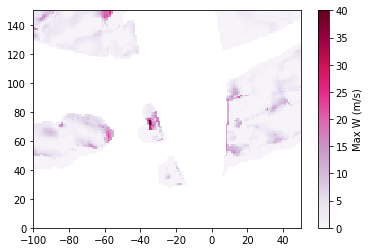

In [42]:
cs = plt.pcolormesh(0.001*pyart_grid.x['data'], 0.001*pyart_grid.y['data'],
                    np.amax(pyart_grid.fields['upward_air_velocity']['data'], axis=0),
                    vmin=0, vmax=40, cmap='PuRd')
plt.colorbar(cs, label='Max W (m/s)')

Text(0, 0.5, 'Distance north of ARMOR (km)')

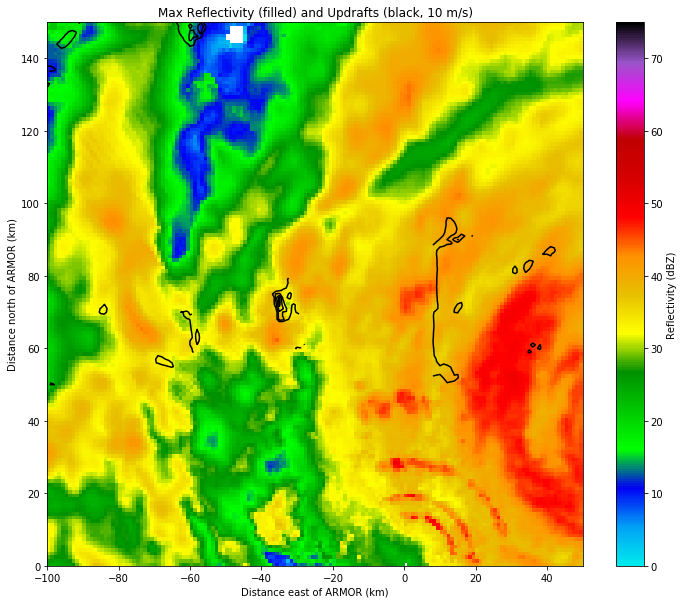

In [43]:
fig = plt.figure(figsize=(12, 10))
DZcomp = np.amax(pyart_grid.fields['reflectivity']['data'], axis=0)
x, y = np.meshgrid(0.001*pyart_grid.x['data'], 0.001*pyart_grid.y['data'])
cs = plt.pcolormesh(0.001*pyart_grid.x['data'], 0.001*pyart_grid.y['data'],
                    DZcomp, vmin=0, vmax=75, cmap='pyart_NWSRef')
Wcomp = np.amax(pyart_grid.fields['upward_air_velocity']['data'], axis=0)
plt.contour(x, y, Wcomp, levels=[10, 20, 30, 40], colors=['k', 'k', 'k'])
plt.xlim(-100, 50)
plt.ylim(0, 150)
plt.colorbar(cs, label='Reflectivity (dBZ)')
plt.title('Max Reflectivity (filled) and Updrafts (black, 10 m/s)')
plt.xlabel('Distance east of ARMOR (km)')
plt.ylabel('Distance north of ARMOR (km)')

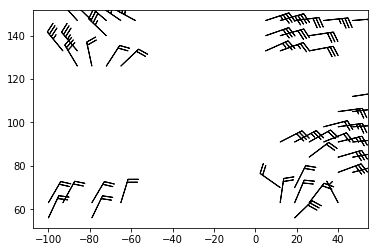

In [46]:
thin =7
ilev =  12
plt.barbs(x[::thin, ::thin], y[::thin, ::thin],
          pyart_grid.fields['eastward_wind']['data'][ilev][::thin, ::thin],
          pyart_grid.fields['northward_wind']['data'][ilev][::thin, ::thin])

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'label'
  s)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:688: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


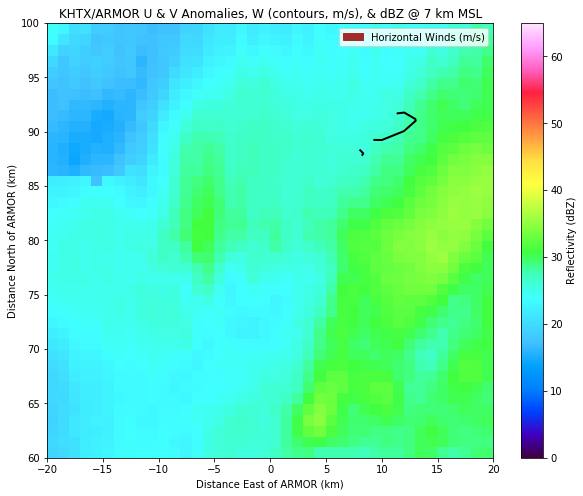

In [23]:
from mpl_toolkits.basemap import cm
lwys = cm.GMT_wysiwyg

ind = 6

U = pyart_grid.fields['eastward_wind']['data']
V = pyart_grid.fields['northward_wind']['data']
W = pyart_grid.fields['upward_air_velocity']['data']

Z = pyart_grid.fields['reflectivity']['data']

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
cs = ax.pcolormesh(0.001*pyart_grid.x['data'], 0.001*pyart_grid.y['data'],
                   Z[ind], vmin=0, vmax=65, cmap=lwys)

x, y = np.meshgrid(0.001*pyart_grid.x['data'], 0.001*pyart_grid.y['data'])
cl = plt.contour(x, y, W[ind], levels=[10, 20, 30, 40], colors=['k'], linewidths=2,
                 label='Updraft (every 10 m/s)')
plt.clabel(cl, inline=1, fontsize=10, fmt='%1.0f', inline_spacing=0.01)

thin = 2
Um = np.median(U[ind])
Vm = np.median(V[ind])

ax.barbs(x[::thin, ::thin], y[::thin, ::thin], U[ind][::thin, ::thin]-Um,
         V[ind][::thin, ::thin]-Vm, pivot='middle', color='brown', length=6,
         sizes=dict(emptybarb=0), label='Horizontal Winds (m/s)')

plt.colorbar(cs, label='Reflectivity (dBZ)', ax=ax)

# ax.set_xlim(-65, -30)
# ax.set_ylim(55, 90)
ax.set_xlim(-20, 20)
ax.set_ylim(60, 100)
ax.set_xlabel('Distance East of ARMOR (km)')
ax.set_ylabel('Distance North of ARMOR (km)')
ax.set_title('KHTX/ARMOR U & V Anomalies, W (contours, m/s),' +
             ' & dBZ @ '+str(ind+1)+' km MSL')
plt.legend(loc='upper right')